In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [5]:
df.shape

(768, 9)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().values.any()

False

In [8]:
df = df.rename(columns={'Outcome': 'Diabetes'})

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    

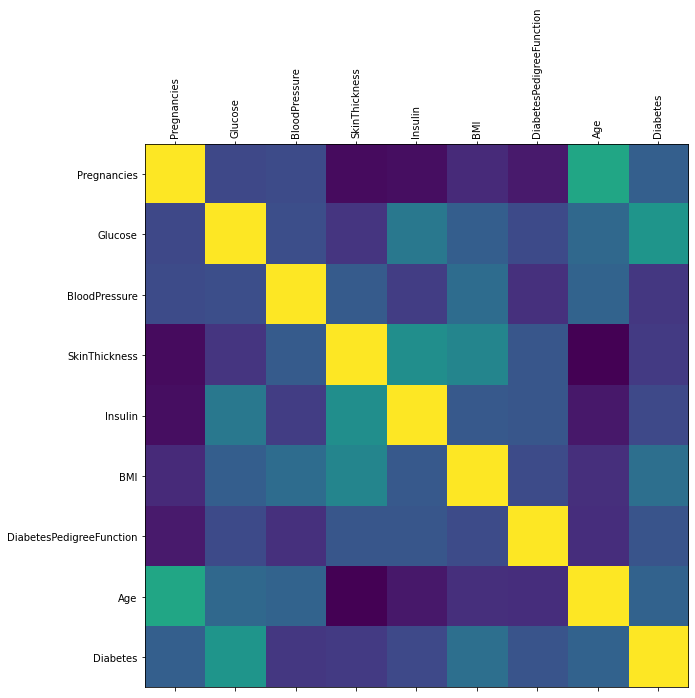

In [11]:
plot_corr (df)

In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
num_true = len(df.loc[df['Diabetes'] == True])
num_false = len(df.loc[df['Diabetes'] == False])
print('Número de Casos Verdadeiros: {0} ({1:2.2f}%)'.format(num_true, (num_true/ (num_true + num_false)) *100))
print('Número de Casos Falsos     : {0} ({1:2.2f}%)'.format(num_false, (num_false/ (num_false + num_true)) *100))


Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos     : 500 (65.10%)


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

In [16]:
variaveis = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age']

In [17]:
target = ['Diabetes']

In [18]:
x = df[variaveis].values
y = df[target].values

In [19]:
split_test_size = 0.30

In [20]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = split_test_size)

In [21]:
print('{0:0.2f}% nos dados de treino'.format((len(x_treino) /len(df.index)) *100))
print('{0:0.2f}% nos dados de teste'.format((len(x_teste) /len(df.index)) *100))

69.92% nos dados de treino
30.08% nos dados de teste


In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

In [23]:
print('# Linhas no df {0}'.format(len(df)))
print('# Linhas missing Glucose: {0}'.format(len(df.loc[df['Glucose'] ==0])))
print('# Linhas missing BloodPressure: {0}'.format(len(df.loc[df['BloodPressure'] ==0])))
print('# Linhas missing SkinThickness: {0}'.format(len(df.loc[df['SkinThickness'] ==0])))
print('# Linhas missing Insulin: {0}'.format(len(df.loc[df['Insulin'] ==0])))
print('# Linhas missing BMI: {0}'.format(len(df.loc[df['BMI'] ==0])))
print('# Linhas missing DiabetesPedigreeFunction: {0}'.format(len(df.loc[df['DiabetesPedigreeFunction'] ==0])))
print('# Linhas missing Age: {0}'.format(len(df.loc[df['Age'] ==0])))

# Linhas no df 768
# Linhas missing Glucose: 5
# Linhas missing BloodPressure: 35
# Linhas missing SkinThickness: 227
# Linhas missing Insulin: 374
# Linhas missing BMI: 11
# Linhas missing DiabetesPedigreeFunction: 0
# Linhas missing Age: 0


In [24]:
from sklearn.impute import SimpleImputer

In [25]:
preenche_0 = SimpleImputer(missing_values = 0, strategy = 'mean')

In [26]:
x_treino = preenche_0.fit_transform(x_treino)
x_teste = preenche_0.fit_transform(x_teste)

In [27]:
x_treino

array([[4.58185841e+00, 7.40000000e+01, 5.20000000e+01, ...,
        2.78000000e+01, 2.69000000e-01, 2.20000000e+01],
       [3.00000000e+00, 1.58000000e+02, 7.00000000e+01, ...,
        3.55000000e+01, 3.44000000e-01, 3.50000000e+01],
       [1.00000000e+00, 8.80000000e+01, 7.80000000e+01, ...,
        3.20000000e+01, 3.65000000e-01, 2.90000000e+01],
       ...,
       [5.00000000e+00, 1.04000000e+02, 7.40000000e+01, ...,
        2.88000000e+01, 1.53000000e-01, 4.80000000e+01],
       [2.00000000e+00, 1.30000000e+02, 9.60000000e+01, ...,
        2.26000000e+01, 2.68000000e-01, 2.10000000e+01],
       [9.00000000e+00, 1.84000000e+02, 8.50000000e+01, ...,
        3.00000000e+01, 1.21300000e+00, 4.90000000e+01]])

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
modelo_v1 = GaussianNB()

In [30]:
modelo_v1.fit(x_treino, y_treino.ravel())

GaussianNB()

In [31]:
from sklearn import metrics

In [32]:
predict_target = modelo_v1.predict(x_treino)
print ('Exatidão (Accuracy): {0:.2f}%'.format(metrics.accuracy_score(y_treino, predict_target) *100))
print()


Exatidão (Accuracy): 75.42%



In [33]:
predict_test = modelo_v1.predict(x_teste)
print ('Exatidão (Accuracy): {0:.2f}%'.format(metrics.accuracy_score(y_teste, predict_test) *100))
print()

Exatidão (Accuracy): 77.06%



In [34]:
print('Confusion Matrix')

print('{0}'.format(metrics.confusion_matrix(y_teste, predict_test, labels = [1,0])))
print('')

print('Classification Report')
print(metrics.classification_report(y_teste, predict_test, labels = [1,0]))

Confusion Matrix
[[ 45  32]
 [ 21 133]]

Classification Report
              precision    recall  f1-score   support

           1       0.68      0.58      0.63        77
           0       0.81      0.86      0.83       154

    accuracy                           0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.77      0.77       231



In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
modelo_v2 = RandomForestClassifier()
modelo_v2.fit(x_treino, y_treino.ravel())

RandomForestClassifier()

In [37]:
rf_predict_treino = modelo_v2.predict(x_treino)
print ('Exatidão (Accuracy): {0:.2f}%'.format(metrics.accuracy_score(y_treino, rf_predict_treino) *100))
print()

Exatidão (Accuracy): 100.00%



In [38]:
rf_predict_test = modelo_v2.predict(x_teste)
print ('Exatidão (Accuracy): {0:.2f}%'.format(metrics.accuracy_score(y_teste, rf_predict_test) *100))
print()

Exatidão (Accuracy): 76.62%



In [39]:
print('Confusion Matrix')

print('{0}'.format(metrics.confusion_matrix(y_teste, rf_predict_test, labels = [1,0])))
print('')

print('Classification Report')
print(metrics.classification_report(y_teste, rf_predict_test, labels = [1,0]))

Confusion Matrix
[[ 46  31]
 [ 23 131]]

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.60      0.63        77
           0       0.81      0.85      0.83       154

    accuracy                           0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
modelo_v3 = LogisticRegression()
modelo_v3.fit(x_treino, y_treino.ravel())
lm_predict_treino = modelo_v3.predict(x_treino)
print ('Exatidão (Accuracy): {0:.2f}%'.format(metrics.accuracy_score(y_treino, lm_predict_treino) *100))
print()

Exatidão (Accuracy): 76.72%



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
lm_predict_test = modelo_v2.predict(x_teste)
print ('Exatidão (Accuracy): {0:.2f}%'.format(metrics.accuracy_score(y_teste, rf_predict_test) *100))
print()

Exatidão (Accuracy): 76.62%



In [43]:
print('Confusion Matrix')

print('{0}'.format(metrics.confusion_matrix(y_teste, lm_predict_test, labels = [1,0])))
print('')

print('Classification Report')
print(metrics.classification_report(y_teste, lm_predict_test, labels = [1,0]))

Confusion Matrix
[[ 46  31]
 [ 23 131]]

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.60      0.63        77
           0       0.81      0.85      0.83       154

    accuracy                           0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



In [44]:
print('Resumo:')
print ('Exatidão do GaussianNB (Accuracy): {0:.2f}%'.format(metrics.accuracy_score(y_teste, predict_test) *100))
print ('Exatidão do RandomForestClassifier (Accuracy): {0:.2f}%'.format(metrics.accuracy_score(y_teste, rf_predict_test) *100))
print ('Exatidão do LogisticRegression (Accuracy): {0:.2f}%'.format(metrics.accuracy_score(y_teste, lm_predict_test) *100))
print()

Resumo:
Exatidão do GaussianNB (Accuracy): 77.06%
Exatidão do RandomForestClassifier (Accuracy): 76.62%
Exatidão do LogisticRegression (Accuracy): 76.62%

